In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
#导入测试集和训练集
train=pd.read_csv("pfm_train.csv")
test=pd.read_csv("pfm_test.csv")
conbine=[train,test]
#这一句的作用是将测试集中乘客的ID列提取出来并赋值给变量EmployeeNumber，以便在最终预测结果时能够与乘客ID对应起来。
#这对于生成提交到比赛或者评估模型性能时所需的格式是很有用的。
EmployeeNumber=test['EmployeeNumber']

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1100 non-null   int64 
 1   Attrition                 1100 non-null   int64 
 2   BusinessTravel            1100 non-null   object
 3   Department                1100 non-null   object
 4   DistanceFromHome          1100 non-null   int64 
 5   Education                 1100 non-null   int64 
 6   EducationField            1100 non-null   object
 7   EmployeeNumber            1100 non-null   int64 
 8   EnvironmentSatisfaction   1100 non-null   int64 
 9   Gender                    1100 non-null   object
 10  JobInvolvement            1100 non-null   int64 
 11  JobLevel                  1100 non-null   int64 
 12  JobRole                   1100 non-null   object
 13  JobSatisfaction           1100 non-null   int64 
 14  MaritalStatus           

In [6]:
train.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


可分类数据：

Attrition：员工是否已经离职，1表示已经离职，2表示未离职，这是目标预测值；

BusinessTravel：商务差旅频率，Non-Travel表示不出差，Travel_Rarely表示不经常出差，Travel_Frequently表示经常出差；

Department：员工所在部门，Sales表示销售部，Research & Development表示研发部，Human Resources表示人力资源部；



Education：员工的教育程度，从1到5，5表示教育程度最高；

EducationField：员工所学习的专业领域，Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他；

EnvironmentSatisfaction：员工对于工作环境的满意程度，从1到4，1的满意程度最低，4的满意程度最高；

Gender：员工性别，Male表示男性，Female表示女性；

JobInvolvement：员工工作投入度，从1到4，1为投入度最低，4为投入度最高；

JobLevel：职业级别，从1到5，1为最低级别，5为最高级别；

JobRole：工作角色：Sales Executive是销售主管，Research Scientist是科学研究员，Laboratory Technician实验室技术员，Manufacturing Director是制造总监，Healthcare Representative是医疗代表，Manager是经理，Sales Representative是销售代表，Research Director是研究总监，Human Resources是人力资源；

JobSatisfaction：工作满意度，从1到4，1代表满意程度最低，4代表满意程度最高；

MaritalStatus：员工婚姻状况，Single代表单身，Married代表已婚，Divorced代表离婚；

NumCompaniesWorked：员工曾经工作过的公司数；（连续或分类都可以，分类比较好）

Over18：年龄是否超过18岁；

OverTime：是否加班，Yes表示加班，No表示不加班；

PercentSalaryHike：工资提高的百分比；

PerformanceRating：绩效评估；

RelationshipSatisfaction：关系满意度，从1到4，1表示满意度最低，4表示满意度最高；

StockOptionLevel：股票期权水平；

TrainingTimesLastYear：上一年的培训时长，从0到6，0表示没有培训，6表示培训时间最长；

WorkLifeBalance：工作与生活平衡程度，从1到4，1表示平衡程度最低，4表示平衡程度最高；

YearsAtCompany：在目前公司工作年数；



连续数据：

Age：员工年龄

DistanceFromHome：公司跟家庭住址的距离，从1到29，1表示最近，29表示最远；

MonthlyIncome：员工月收入，范围在1009到19999之间；

NumCompaniesWorked：员工曾经工作过的公司数；（连续或分类都可以，分类比较好）

PercentSalaryHike：工资提高的百分比；

TotalWorkingYears：总工龄；

YearsAtCompany：在目前公司工作年数；

YearsInCurrentRole：在目前工作职责的工作年数

YearsSinceLastPromotion：距离上次升职时长

YearsWithCurrManager：跟目前的管理者共事年数；



无效数据：

EmployeeNumber：员工号码；

Over18：年龄是否超过18岁；

StandardHours：标准工时；



分类数据：

In [7]:
# BusinessTravel(出差频率)与Attrition（1离职0未离职）关系
train[['BusinessTravel','Attrition']].groupby('BusinessTravel',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,BusinessTravel,Attrition
1,Travel_Frequently,0.224390
2,Travel_Rarely,0.156290
0,Non-Travel,0.083333


In [8]:
# Department（部门）与Attrition关系
train[['Department','Attrition']].groupby('Department',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,Department,Attrition
0,Human Resources,0.214286
2,Sales,0.202417
1,Research & Development,0.140303


In [9]:
#Education：员工的教育程度与Attrition关系
train[['Education','Attrition']].groupby('Education',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,Education,Attrition
0,1,0.214286
2,3,0.167053
3,4,0.156146
1,2,0.145631
4,5,0.055556


In [10]:
# EducationField与Attrition关系
train[['EducationField','Attrition']].groupby('EducationField',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,EducationField,Attrition
0,Human Resources,0.315789
5,Technical Degree,0.239130
2,Marketing,0.212598
1,Life Sciences,0.151515
3,Medical,0.136499
4,Other,0.111111


In [11]:
# EnvironmentSatisfaction与Attrition关系
train[['EnvironmentSatisfaction','Attrition']].groupby('EnvironmentSatisfaction',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,EnvironmentSatisfaction,Attrition
0,1,0.246512
1,2,0.157143
3,4,0.139053
2,3,0.133531


In [12]:
# Gender与Attrition关系
train[['Gender','Attrition']].groupby('Gender',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,Gender,Attrition
1,Male,0.166922
0,Female,0.154362


In [13]:
# JobInvolvement与Attrition关系
train[['JobInvolvement','Attrition']].groupby('JobInvolvement',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,JobInvolvement,Attrition
0,1,0.380952
1,2,0.168498
2,3,0.146747
3,4,0.106796


In [14]:
# JobLevel与Attrition关系
train[['JobLevel','Attrition']].groupby('JobLevel',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,JobLevel,Attrition
0,1,0.259709
2,3,0.127389
1,2,0.107769
4,5,0.098039
3,4,0.037037


In [15]:
# JobRole与Attrition关系
train[['JobRole','Attrition']].groupby('JobRole',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,JobRole,Attrition
8,Sales Representative,0.403509
1,Human Resources,0.272727
2,Laboratory Technician,0.209756
6,Research Scientist,0.185520
7,Sales Executive,0.170040
4,Manufacturing Director,0.079208
3,Manager,0.062500
0,Healthcare Representative,0.050000
5,Research Director,0.035714


In [16]:
# JobSatisfaction与Attrition关系
train[['JobSatisfaction','Attrition']].groupby('JobSatisfaction',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,JobSatisfaction,Attrition
0,1,0.242009
1,2,0.174757
2,3,0.156923
3,4,0.108571


In [17]:
# MaritalStatus与Attrition关系
train[['MaritalStatus','Attrition']].groupby('MaritalStatus',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,MaritalStatus,Attrition
2,Single,0.259669
1,Married,0.124000
0,Divorced,0.092437


In [18]:
# NumCompaniesWorked）与Attrition关系
train[['NumCompaniesWorked','Attrition']].groupby('NumCompaniesWorked',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,NumCompaniesWorked,Attrition
5,5,0.244444
7,7,0.232143
6,6,0.211538
1,1,0.194872
9,9,0.189189
4,4,0.148515
8,8,0.121951
0,0,0.119205
2,2,0.115044
3,3,0.078947


In [19]:
# OverTime与Attrition关系
train[['OverTime','Attrition']].groupby('OverTime',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,OverTime,Attrition
1,Yes,0.320261
0,No,0.100756


In [20]:
# PercentSalaryHike）与Attrition关系
train[['PercentSalaryHike','Attrition']].groupby('PercentSalaryHike',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,PercentSalaryHike,Attrition
13,24,0.416667
12,23,0.277778
11,22,0.244444
4,15,0.205479
1,12,0.179856
0,11,0.179487
6,17,0.173913
5,16,0.166667
2,13,0.160494
9,20,0.159091


In [21]:
# PerformanceRating）与Attrition关系
train[['PerformanceRating','Attrition']].groupby('PerformanceRating',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,PerformanceRating,Attrition
1,4,0.202381
0,3,0.154506


In [22]:
# RelationshipSatisfaction）与Attrition关系
train[['RelationshipSatisfaction','Attrition']].groupby('RelationshipSatisfaction',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,RelationshipSatisfaction,Attrition
0,1,0.204545
2,3,0.158824
1,2,0.152074
3,4,0.142415


In [23]:
# StockOptionLevel）与Attrition关系
train[['StockOptionLevel','Attrition']].groupby('StockOptionLevel',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,StockOptionLevel,Attrition
0,0,0.251586
3,3,0.220339
1,1,0.085202
2,2,0.065574


In [24]:
# TrainingTimesLastYear（部门）与Attrition关系
train[['TrainingTimesLastYear','Attrition']].groupby('TrainingTimesLastYear',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,TrainingTimesLastYear,Attrition
0,0,0.250000
4,4,0.191489
2,2,0.181818
3,3,0.145119
6,6,0.125000
5,5,0.123596
1,1,0.100000


In [25]:
# WorkLifeBalance）与Attrition关系
train[['WorkLifeBalance','Attrition']].groupby('WorkLifeBalance',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,WorkLifeBalance,Attrition
0,1,0.269841
3,4,0.194175
1,2,0.175781
2,3,0.141593


In [26]:
# YearsAtCompany）与Attrition关系
train[['YearsAtCompany','Attrition']].groupby('YearsAtCompany',as_index=False).mean().sort_values(by='Attrition',ascending=False)

,YearsAtCompany,Attrition
1,1,0.358209
29,31,0.333333
30,32,0.333333
0,0,0.266667
23,24,0.250000
2,2,0.212766
31,33,0.200000
6,6,0.153846
10,10,0.152174
4,4,0.150000


连续数据

(array([ 8., 10.,  8., 15., 12., 24., 21., 19., 11.,  6.,  8.,  7.,  5.,
         5.,  2.,  3.,  4.,  2.,  5.,  3.]),
 array([19.  , 20.95, 22.9 , 24.85, 26.8 , 28.75, 30.7 , 32.65, 34.6 ,
        36.55, 38.5 , 40.45, 42.4 , 44.35, 46.3 , 48.25, 50.2 , 52.15,
        54.1 , 56.05, 58.  ]),
 <BarContainer object of 20 artists>)

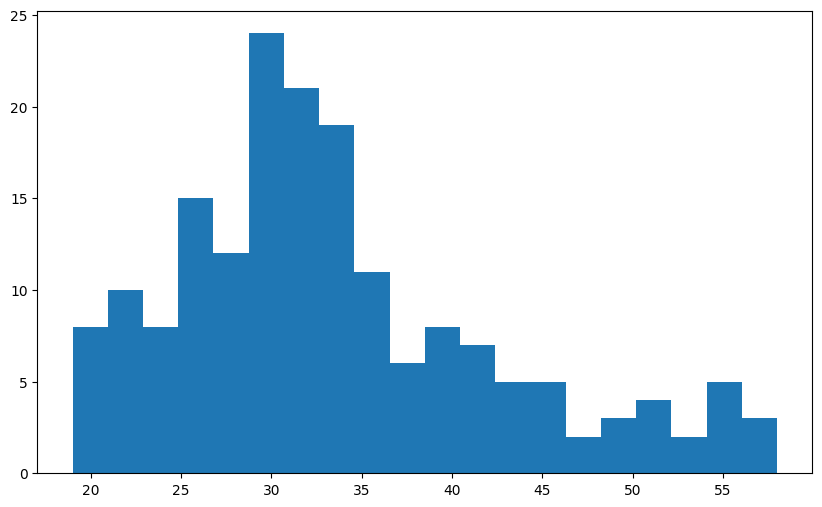

In [27]:
plt.figure(figsize=(10,6))
plt.hist(train.Age[train['Attrition']==1],bins=20)

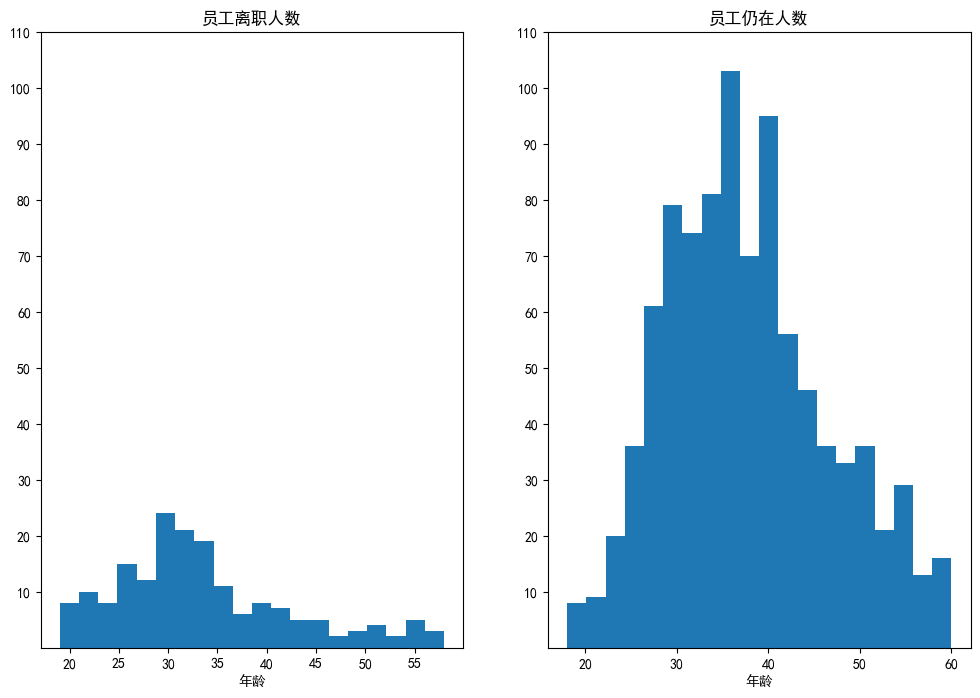

In [28]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('员工离职人数')
ax1.hist(train.Age[train['Attrition']==1],bins=20)
ax1.set_xlabel('年龄')
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100,110])

ax2.set_title('员工仍在人数')
ax2.hist(train.Age[train['Attrition']==0],bins=20)
ax2.set_xlabel('年龄')
ax2.set_yticks([10,20,30,40,50,60,70,80,90,100,110])

plt.show()

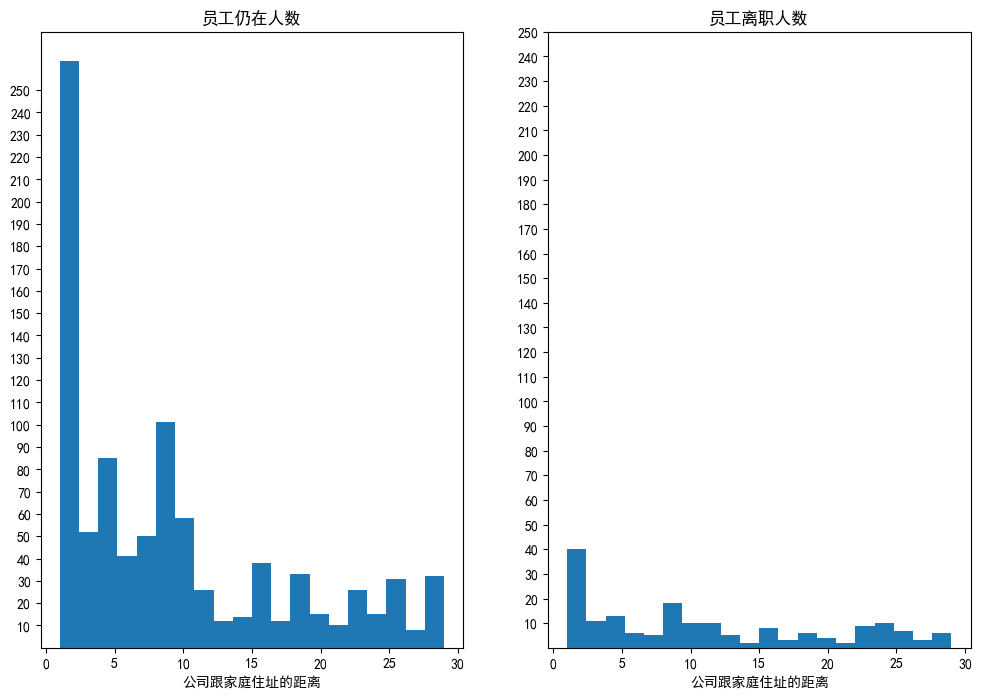

In [29]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('员工仍在人数')
ax1.hist(train.DistanceFromHome[train['Attrition']==0],bins=20)
ax1.set_xlabel('公司跟家庭住址的距离')
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])

ax2.set_title('员工离职人数')
ax2.hist(train.DistanceFromHome[train['Attrition']==1],bins=20)
ax2.set_xlabel('公司跟家庭住址的距离')
ax2.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])


plt.show()

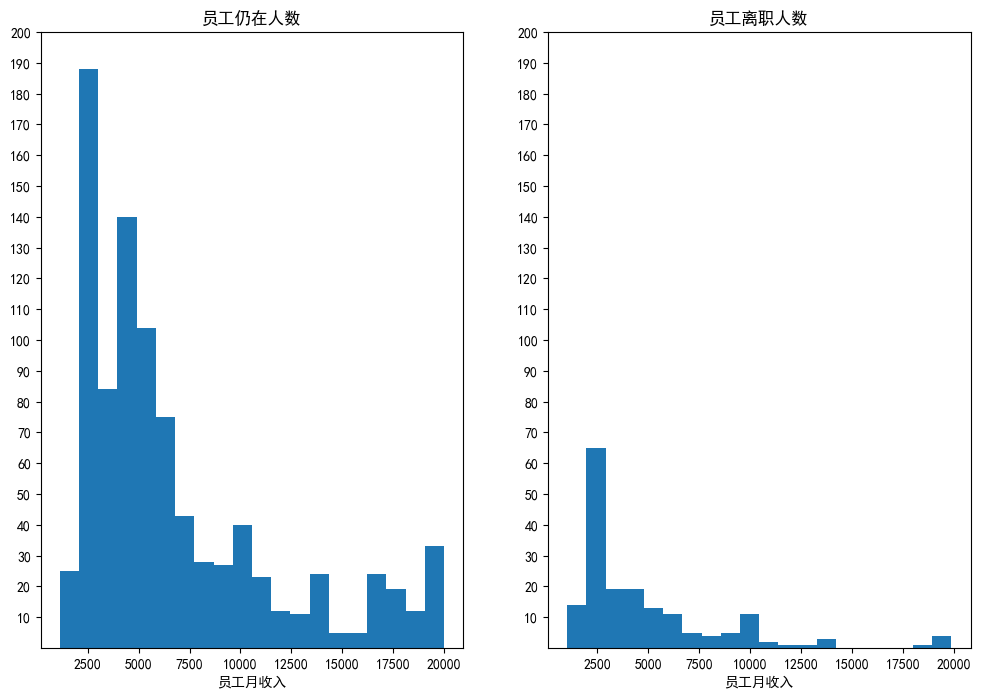

In [30]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('员工仍在人数')
ax1.hist(train.MonthlyIncome[train['Attrition']==0],bins=20)
ax1.set_xlabel('员工月收入')
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])

ax2.set_title('员工离职人数')
ax2.hist(train.MonthlyIncome[train['Attrition']==1],bins=20)
ax2.set_xlabel('员工月收入')
ax2.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])


plt.show()

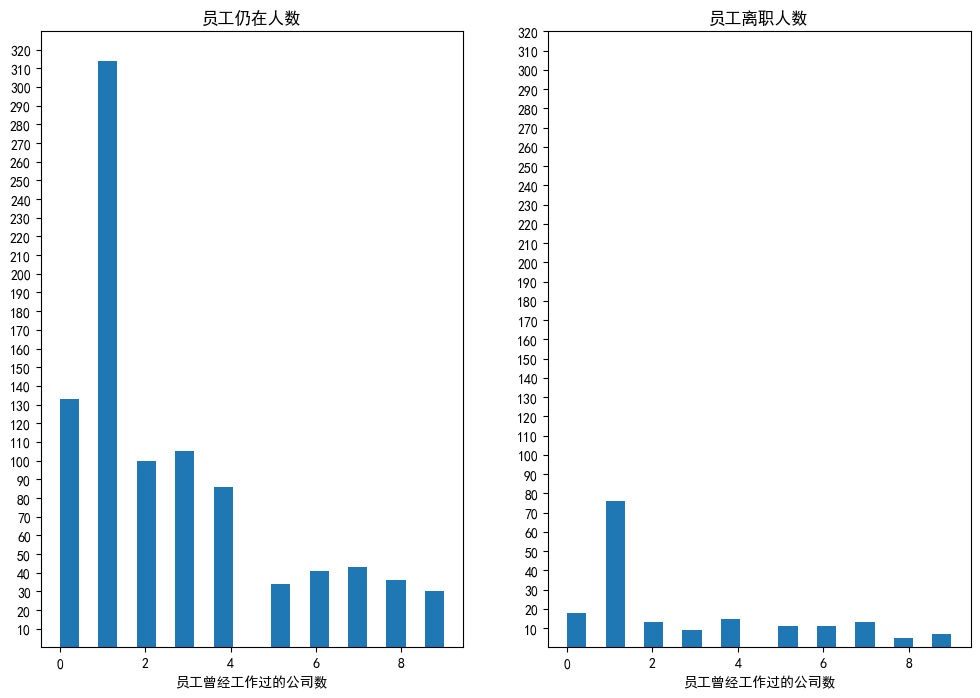

In [31]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('员工仍在人数')
ax1.hist(train.NumCompaniesWorked[train['Attrition']==0],bins=20)
ax1.set_xlabel('员工曾经工作过的公司数')
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320])

ax2.set_title('员工离职人数')
ax2.hist(train.NumCompaniesWorked[train['Attrition']==1],bins=20)
ax2.set_xlabel('员工曾经工作过的公司数')
ax2.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320])


plt.show()

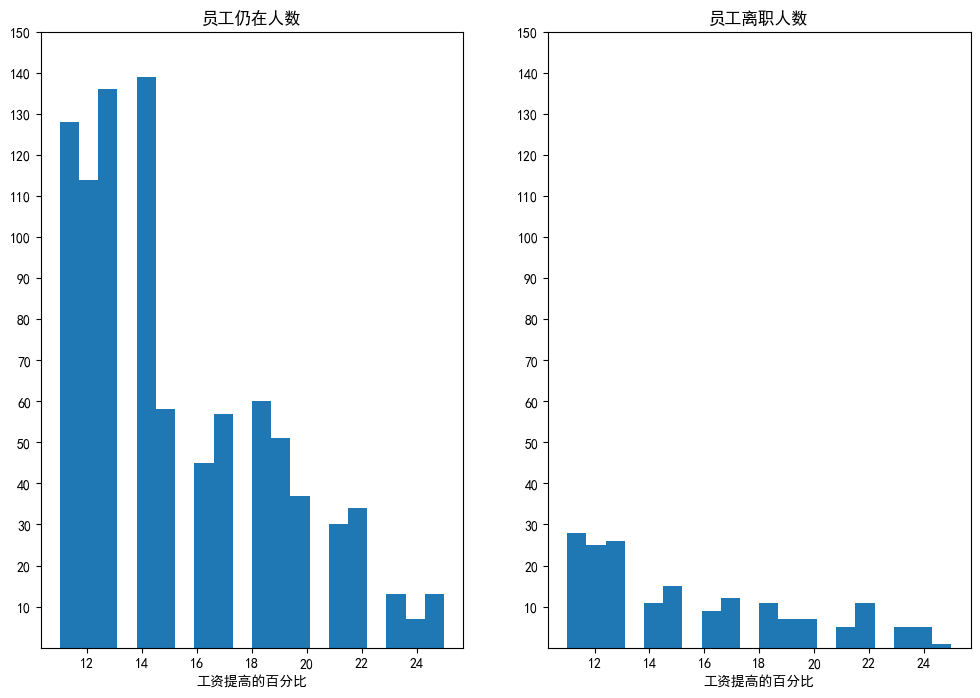

In [32]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('员工仍在人数')
ax1.hist(train.PercentSalaryHike[train['Attrition']==0],bins=20)
ax1.set_xlabel('工资提高的百分比')
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])

ax2.set_title('员工离职人数')
ax2.hist(train.PercentSalaryHike[train['Attrition']==1],bins=20)
ax2.set_xlabel('工资提高的百分比')
ax2.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])


plt.show()

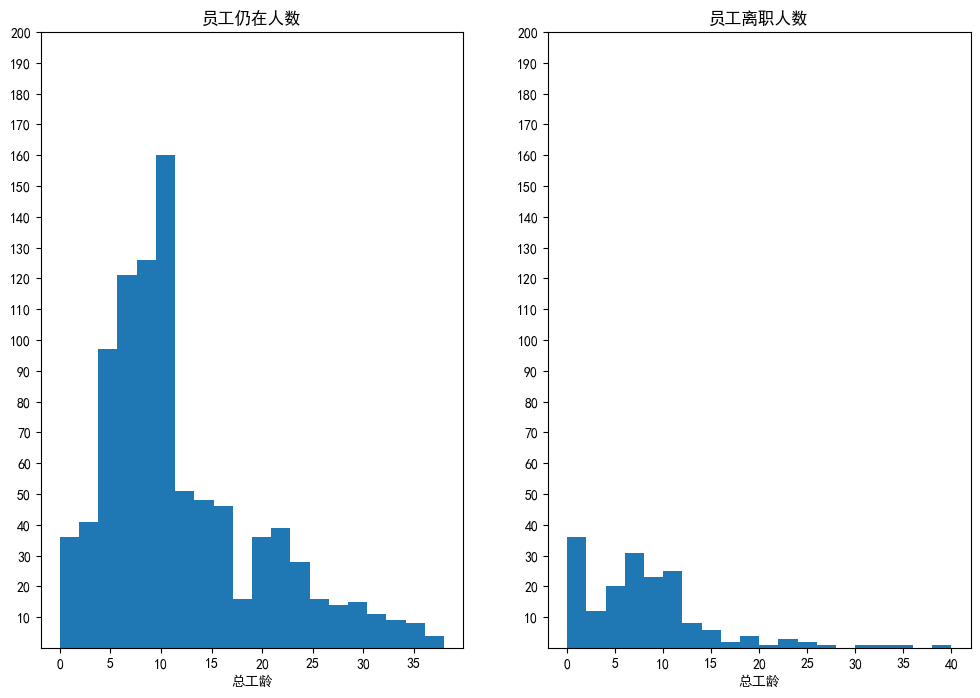

In [33]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('员工仍在人数')
ax1.hist(train.TotalWorkingYears[train['Attrition']==0],bins=20)
ax1.set_xlabel('总工龄')
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])

ax2.set_title('员工离职人数')
ax2.hist(train.TotalWorkingYears[train['Attrition']==1],bins=20)
ax2.set_xlabel('总工龄')
ax2.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])


plt.show()

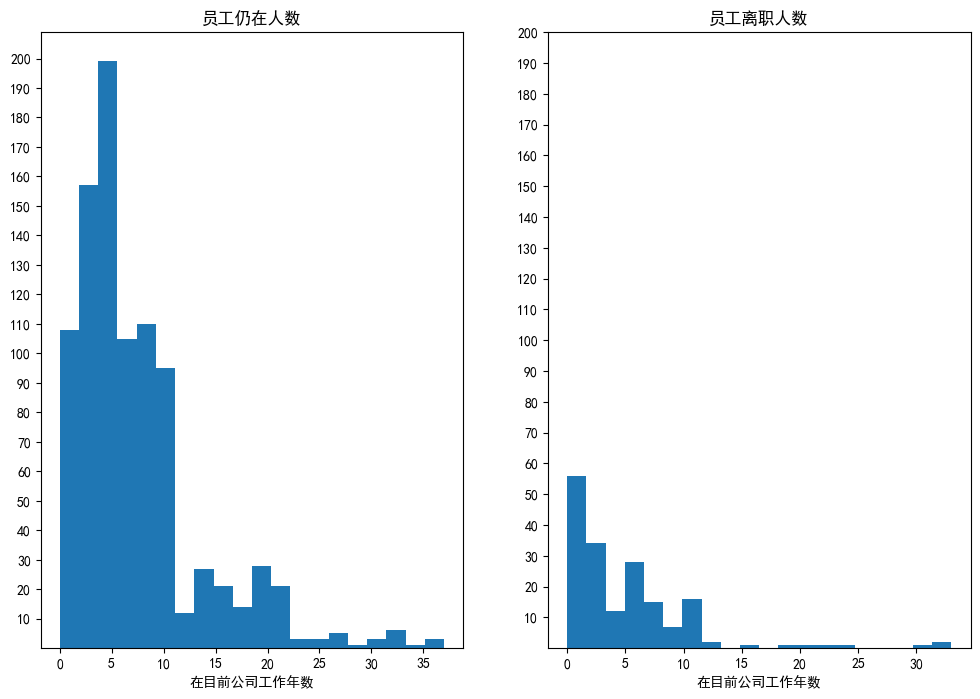

In [34]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('员工仍在人数')
ax1.hist(train.YearsAtCompany[train['Attrition']==0],bins=20)
ax1.set_xlabel('在目前公司工作年数')
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])

ax2.set_title('员工离职人数')
ax2.hist(train.YearsAtCompany[train['Attrition']==1],bins=20)
ax2.set_xlabel('在目前公司工作年数')
ax2.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])


plt.show()

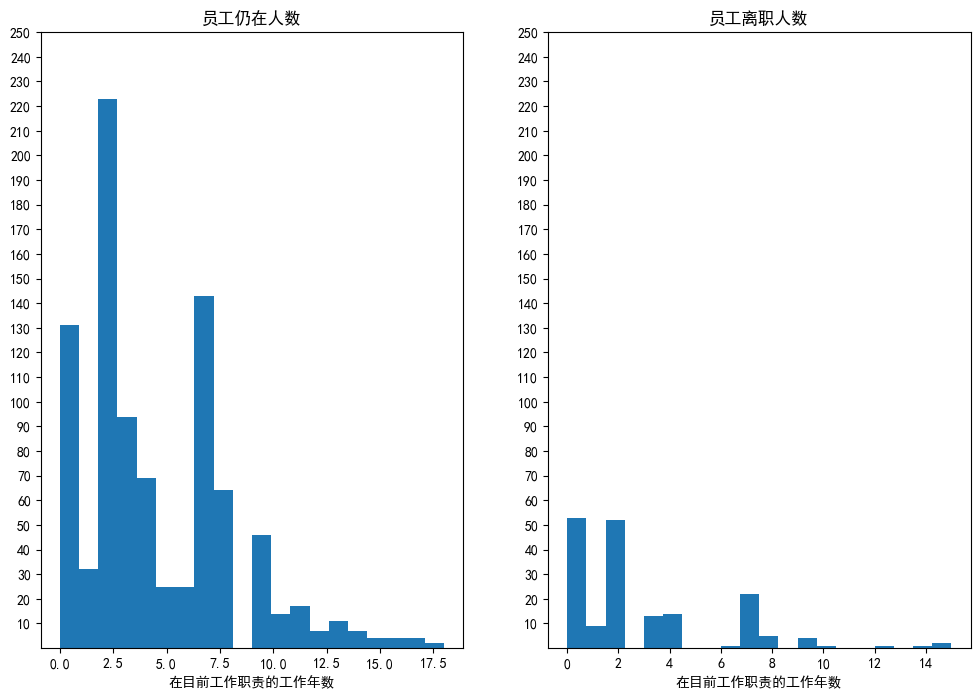

In [35]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('员工仍在人数')
ax1.hist(train.YearsInCurrentRole[train['Attrition']==0],bins=20)
ax1.set_xlabel('在目前工作职责的工作年数')
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])

ax2.set_title('员工离职人数')
ax2.hist(train.YearsInCurrentRole[train['Attrition']==1],bins=20)
ax2.set_xlabel('在目前工作职责的工作年数')
ax2.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])


plt.show()

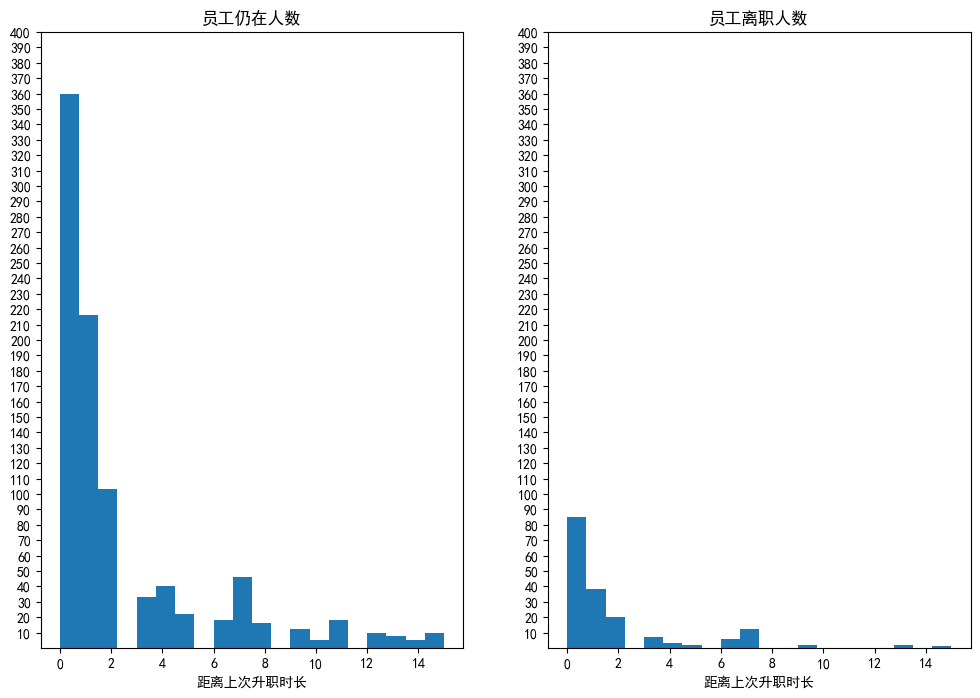

In [36]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('员工仍在人数')
ax1.hist(train.YearsSinceLastPromotion[train['Attrition']==0],bins=20)
ax1.set_xlabel('距离上次升职时长')
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400])

ax2.set_title('员工离职人数')
ax2.hist(train.YearsSinceLastPromotion[train['Attrition']==1],bins=20)
ax2.set_xlabel('距离上次升职时长')
ax2.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400])


plt.show()

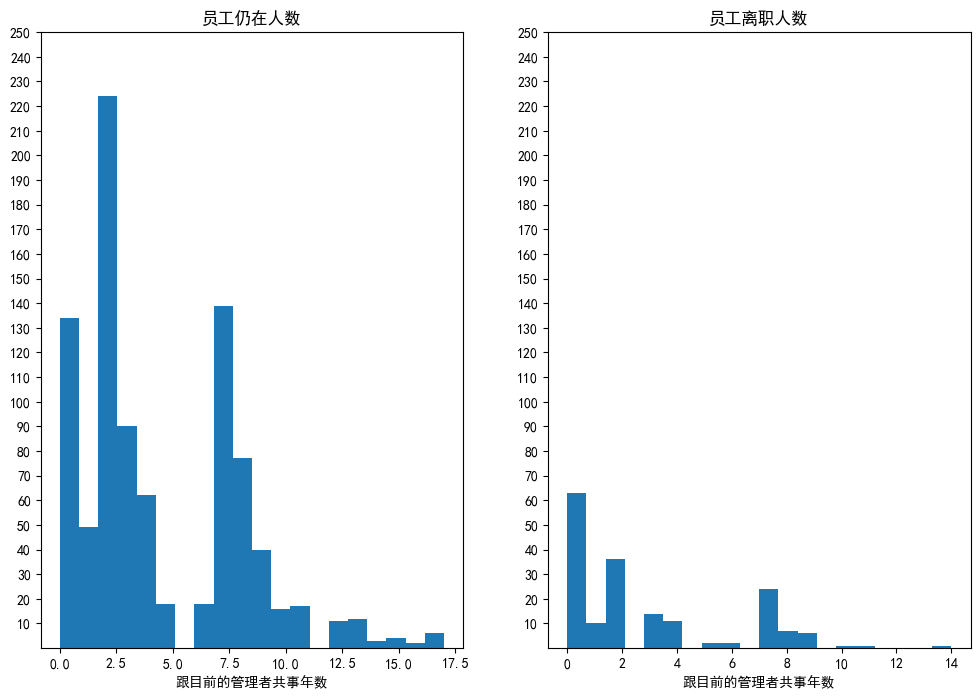

In [37]:
plt.figure(figsize=(12,8))

mpl.rcParams['font.family']='SimHei'

ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.set_title('员工仍在人数')
ax1.hist(train.YearsWithCurrManager[train['Attrition']==0],bins=20)
ax1.set_xlabel('跟目前的管理者共事年数')
ax1.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])

ax2.set_title('员工离职人数')
ax2.hist(train.YearsWithCurrManager[train['Attrition']==1],bins=20)
ax2.set_xlabel('跟目前的管理者共事年数')
ax2.set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])


plt.show()

数据清洗：

In [38]:
# 删除无用特征
train.head()
train=train.drop(["Over18","StandardHours"],axis=1)
test=test.drop(["Over18","StandardHours"],axis=1)
combine=[train,test]

处理非数字类型变量

In [39]:
# 处理BusinessTravel
for database in combine:#对combine列表中的每个数据集（train和test）进行操作。
    database['BusinessTravel']=database['BusinessTravel'].map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2}).astype(int)

In [40]:
# 处理Department
for database in combine:
    database['Department']=database['Department'].map({'Sales':0,'Research & Development':1,'Human Resources':2}).astype(int)

In [41]:
# 处理EducationField
for database in combine:
    database['EducationField']=database['EducationField'].map({'Life Sciences':0,'Medical':1,'Marketing':2,'Technical Degree':3,'Human Resources':4,'Other':5}).astype(int)

In [42]:
# 处理Gender
for database in combine:
    database['Gender']=database['Gender'].map({'Female':1,'Male':0}).astype(int)

In [43]:
# 处理JobRole
for database in combine:
    database['JobRole']=database['JobRole'].map({'Sales Executive':0,'Research Scientist':1,'Laboratory Technician':2,'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,'Sales Representative':6,'Research Director':7,'Human Resources':8}).astype(int)

In [44]:
# 处理MaritalStatus
for database in combine:
    database['MaritalStatus']=database['MaritalStatus'].map({'Single':0,'Married':1,'Divorced':2}).astype(int)

In [45]:
# 处理OverTime
for database in combine:
    database['OverTime']=database['OverTime'].map({'Yes':1,'No':0}).astype(int)

In [46]:
#查看数据类型是否全为有效数字
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1100 non-null   int64
 1   Attrition                 1100 non-null   int64
 2   BusinessTravel            1100 non-null   int32
 3   Department                1100 non-null   int32
 4   DistanceFromHome          1100 non-null   int64
 5   Education                 1100 non-null   int64
 6   EducationField            1100 non-null   int32
 7   EmployeeNumber            1100 non-null   int64
 8   EnvironmentSatisfaction   1100 non-null   int64
 9   Gender                    1100 non-null   int32
 10  JobInvolvement            1100 non-null   int64
 11  JobLevel                  1100 non-null   int64
 12  JobRole                   1100 non-null   int32
 13  JobSatisfaction           1100 non-null   int64
 14  MaritalStatus             1100 non-null 

连续特征转化为离散特征

train['AgeBand']是在 train 数据集中添加的新列，其作用是根据 train 数据集中的 Age 列将年龄数据进行分段处理。具体地，pd.cut() 函数将 train['Age'] 列的数值按照指定的区间进行划分，生成对应的分类变量。在这里，pd.cut(train['Age'], 5) 将年龄数据分成了5个等距的区间，然后将每个样本的年龄映射到对应的区间范围内，生成了 train['AgeBand'] 列。这样做的目的是将连续的年龄数据转换为有序的分类变量，方便后续的数据分析和建模过程。

In [47]:
train['AgeBand']= pd.cut(train['Age'],5)
train['AgeBand']

0         (34.8, 43.2]
1         (51.6, 60.0]
2         (26.4, 34.8]
3         (34.8, 43.2]
4         (26.4, 34.8]
             ...      
1095      (34.8, 43.2]
1096      (34.8, 43.2]
1097      (34.8, 43.2]
1098    (17.958, 26.4]
1099    (17.958, 26.4]
Name: AgeBand, Length: 1100, dtype: category
Categories (5, interval[float64, right]): [(17.958, 26.4] < (26.4, 34.8] < (34.8, 43.2] < (43.2, 51.6] < (51.6, 60.0]]

In [48]:
# 处理Age，离散化

for database in combine:
    database.loc[(database['Age']>=18)&(database['Age']<26),'Age']=0
    database.loc[(database['Age']>=26)&(database['Age']<35),'Age']=1
    database.loc[(database['Age']>=35)&(database['Age']<43),'Age']=2
    database.loc[(database['Age']>=43)&(database['Age']<52),'Age']=3
    database.loc[database['Age']>=52,'Age']=4
    
train.drop(['AgeBand'],axis=1,inplace=True)
conmbine=[train,test]

In [49]:
#对DistanceFromHome离散处理
train['DistanceFromHomeBand'] = pd.qcut(train['DistanceFromHome'],5)
train

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHomeBand
0,2,0,1,1,1,4,0,77,1,0,...,3,1,7,2,4,7,5,0,7,"(0.999, 2.0]"
1,4,0,2,1,1,4,0,1245,4,1,...,1,1,33,2,1,5,4,1,4,"(0.999, 2.0]"
2,1,1,2,1,7,3,0,147,1,0,...,4,0,9,3,3,9,7,0,6,"(5.0, 9.0]"
3,2,0,1,1,1,1,0,1026,4,1,...,3,1,21,3,3,21,6,11,8,"(0.999, 2.0]"
4,1,1,2,1,1,3,1,1111,1,0,...,1,2,1,2,3,1,0,0,0,"(0.999, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2,0,1,1,23,4,1,75,3,1,...,3,1,4,3,3,2,2,2,2,"(17.0, 29.0]"
1096,2,0,1,0,2,4,2,1835,2,1,...,1,2,20,4,2,4,2,0,3,"(0.999, 2.0]"
1097,2,0,1,0,16,4,2,868,4,0,...,4,2,9,2,3,1,0,0,0,"(9.0, 17.0]"
1098,0,1,1,1,7,1,0,1878,4,0,...,1,0,1,2,3,1,0,0,0,"(5.0, 9.0]"


In [50]:
# 处理DistanceFromHome，离散化

for database in combine:
    database.loc[(database['DistanceFromHome']>=0.999)&(database['DistanceFromHome']<=2),'DistanceFromHome']=0
    database.loc[(database['DistanceFromHome']>2)&(database['DistanceFromHome']<=5),'DistanceFromHome']=1
    database.loc[(database['DistanceFromHome']>5)&(database['DistanceFromHome']<=9),'DistanceFromHome']=2
    database.loc[(database['DistanceFromHome']>9)&(database['DistanceFromHome']<=17),'DistanceFromHome']=3
    database.loc[database['DistanceFromHome']>17,'DistanceFromHome']=4
    
train.drop(['DistanceFromHomeBand'],axis=1,inplace=True)
conmbine=[train,test]

In [51]:
#对MonthlyIncome离散处理
train['MonthlyIncomeBand'] = pd.qcut(train['MonthlyIncome'],5)
train

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeBand
0,2,0,1,1,0,4,0,77,1,0,...,3,1,7,2,4,7,5,0,7,"(5683.0, 9727.6]"
1,4,0,2,1,0,4,0,1245,4,1,...,1,1,33,2,1,5,4,1,4,"(9727.6, 19999.0]"
2,1,1,2,1,2,3,0,147,1,0,...,4,0,9,3,3,9,7,0,6,"(5683.0, 9727.6]"
3,2,0,1,1,0,1,0,1026,4,1,...,3,1,21,3,3,21,6,11,8,"(9727.6, 19999.0]"
4,1,1,2,1,0,3,1,1111,1,0,...,1,2,1,2,3,1,0,0,0,"(1008.999, 2704.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2,0,1,1,4,4,1,75,3,1,...,3,1,4,3,3,2,2,2,2,"(2704.6, 4197.6]"
1096,2,0,1,0,0,4,2,1835,2,1,...,1,2,20,4,2,4,2,0,3,"(4197.6, 5683.0]"
1097,2,0,1,0,3,4,2,868,4,0,...,4,2,9,2,3,1,0,0,0,"(5683.0, 9727.6]"
1098,0,1,1,1,2,1,0,1878,4,0,...,1,0,1,2,3,1,0,0,0,"(1008.999, 2704.6]"


In [52]:
# 处理MonthlyIncome，离散化

for database in combine:
    database.loc[(database['MonthlyIncome']>=1008.999)&(database['MonthlyIncome']<=2704.6),'MonthlyIncome']=0
    database.loc[(database['MonthlyIncome']>2704.6)&(database['MonthlyIncome']<=4197.6),'MonthlyIncome']=1
    database.loc[(database['MonthlyIncome']>4197.6)&(database['MonthlyIncome']<=5683.0),'MonthlyIncome']=2
    database.loc[(database['MonthlyIncome']>5683.0)&(database['MonthlyIncome']<=9727.6),'MonthlyIncome']=3
    database.loc[database['MonthlyIncome']>9727.6,'MonthlyIncome']=4
    
train.drop(['MonthlyIncomeBand'],axis=1,inplace=True)
conmbine=[train,test]

In [53]:
#对NumCompaniesWorked离散处理
train['NumCompaniesWorkedBand'] = pd.qcut(train['NumCompaniesWorked'],3)
train

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorkedBand
0,2,0,1,1,0,4,0,77,1,0,...,3,1,7,2,4,7,5,0,7,"(-0.001, 1.0]"
1,4,0,2,1,0,4,0,1245,4,1,...,1,1,33,2,1,5,4,1,4,"(3.0, 9.0]"
2,1,1,2,1,2,3,0,147,1,0,...,4,0,9,3,3,9,7,0,6,"(-0.001, 1.0]"
3,2,0,1,1,0,1,0,1026,4,1,...,3,1,21,3,3,21,6,11,8,"(-0.001, 1.0]"
4,1,1,2,1,0,3,1,1111,1,0,...,1,2,1,2,3,1,0,0,0,"(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2,0,1,1,4,4,1,75,3,1,...,3,1,4,3,3,2,2,2,2,"(1.0, 3.0]"
1096,2,0,1,0,0,4,2,1835,2,1,...,1,2,20,4,2,4,2,0,3,"(1.0, 3.0]"
1097,2,0,1,0,3,4,2,868,4,0,...,4,2,9,2,3,1,0,0,0,"(3.0, 9.0]"
1098,0,1,1,1,2,1,0,1878,4,0,...,1,0,1,2,3,1,0,0,0,"(-0.001, 1.0]"


In [54]:
# 处理NumCompaniesWorked，离散化

for database in combine:
    database.loc[(database['NumCompaniesWorked']>=0)&(database['NumCompaniesWorked']<=1),'NumCompaniesWorked']=0
    database.loc[(database['NumCompaniesWorked']>1)&(database['NumCompaniesWorked']<=3),'NumCompaniesWorked']=1
    database.loc[database['NumCompaniesWorked']>3,'NumCompaniesWorked']=2
    
train.drop(['NumCompaniesWorkedBand'],axis=1,inplace=True)
conmbine=[train,test]

In [55]:
#对PercentSalaryHike离散处理
train['PercentSalaryHikeBand'] = pd.qcut(train['PercentSalaryHike'],3)
train

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PercentSalaryHikeBand
0,2,0,1,1,0,4,0,77,1,0,...,3,1,7,2,4,7,5,0,7,"(16.0, 25.0]"
1,4,0,2,1,0,4,0,1245,4,1,...,1,1,33,2,1,5,4,1,4,"(16.0, 25.0]"
2,1,1,2,1,2,3,0,147,1,0,...,4,0,9,3,3,9,7,0,6,"(16.0, 25.0]"
3,2,0,1,1,0,1,0,1026,4,1,...,3,1,21,3,3,21,6,11,8,"(13.0, 16.0]"
4,1,1,2,1,0,3,1,1111,1,0,...,1,2,1,2,3,1,0,0,0,"(13.0, 16.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2,0,1,1,4,4,1,75,3,1,...,3,1,4,3,3,2,2,2,2,"(13.0, 16.0]"
1096,2,0,1,0,0,4,2,1835,2,1,...,1,2,20,4,2,4,2,0,3,"(16.0, 25.0]"
1097,2,0,1,0,3,4,2,868,4,0,...,4,2,9,2,3,1,0,0,0,"(16.0, 25.0]"
1098,0,1,1,1,2,1,0,1878,4,0,...,1,0,1,2,3,1,0,0,0,"(16.0, 25.0]"


In [56]:
# 处理PercentSalaryHike，离散化

for database in combine:
    database.loc[(database['PercentSalaryHike']>=0)&(database['PercentSalaryHike']<=13),'PercentSalaryHike']=0
    database.loc[(database['PercentSalaryHike']>13)&(database['PercentSalaryHike']<=16),'PercentSalaryHike']=1
    database.loc[database['PercentSalaryHike']>16,'PercentSalaryHike']=2
    
train.drop(['PercentSalaryHikeBand'],axis=1,inplace=True)
conmbine=[train,test]

In [57]:
#对TotalWorkingYears离散处理
train['TotalWorkingYearsBand'] = pd.qcut(train['TotalWorkingYears'],3)
train

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYearsBand
0,2,0,1,1,0,4,0,77,1,0,...,3,1,7,2,4,7,5,0,7,"(-0.001, 7.0]"
1,4,0,2,1,0,4,0,1245,4,1,...,1,1,33,2,1,5,4,1,4,"(12.0, 40.0]"
2,1,1,2,1,2,3,0,147,1,0,...,4,0,9,3,3,9,7,0,6,"(7.0, 12.0]"
3,2,0,1,1,0,1,0,1026,4,1,...,3,1,21,3,3,21,6,11,8,"(12.0, 40.0]"
4,1,1,2,1,0,3,1,1111,1,0,...,1,2,1,2,3,1,0,0,0,"(-0.001, 7.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2,0,1,1,4,4,1,75,3,1,...,3,1,4,3,3,2,2,2,2,"(-0.001, 7.0]"
1096,2,0,1,0,0,4,2,1835,2,1,...,1,2,20,4,2,4,2,0,3,"(12.0, 40.0]"
1097,2,0,1,0,3,4,2,868,4,0,...,4,2,9,2,3,1,0,0,0,"(7.0, 12.0]"
1098,0,1,1,1,2,1,0,1878,4,0,...,1,0,1,2,3,1,0,0,0,"(-0.001, 7.0]"


In [58]:
# 处理TotalWorkingYears，离散化

for database in combine:
    database.loc[(database['TotalWorkingYears']>=0)&(database['TotalWorkingYears']<=7),'DistanceFromHome']=0
    database.loc[(database['TotalWorkingYears']>7)&(database['TotalWorkingYears']<=12),'DistanceFromHome']=1
    database.loc[database['TotalWorkingYears']>12,'TotalWorkingYears']=2
    
train.drop(['TotalWorkingYearsBand'],axis=1,inplace=True)
conmbine=[train,test]

In [59]:
#对YearsAtCompany离散处理
train['YearsAtCompanyBand'] = pd.qcut(train['YearsAtCompany'],3)
train

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsAtCompanyBand
0,2,0,1,1,0,4,0,77,1,0,...,3,1,7,2,4,7,5,0,7,"(4.0, 8.0]"
1,4,0,2,1,0,4,0,1245,4,1,...,1,1,2,2,1,5,4,1,4,"(4.0, 8.0]"
2,1,1,2,1,1,3,0,147,1,0,...,4,0,9,3,3,9,7,0,6,"(8.0, 37.0]"
3,2,0,1,1,0,1,0,1026,4,1,...,3,1,2,3,3,21,6,11,8,"(8.0, 37.0]"
4,1,1,2,1,0,3,1,1111,1,0,...,1,2,1,2,3,1,0,0,0,"(-0.001, 4.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2,0,1,1,0,4,1,75,3,1,...,3,1,4,3,3,2,2,2,2,"(-0.001, 4.0]"
1096,2,0,1,0,0,4,2,1835,2,1,...,1,2,2,4,2,4,2,0,3,"(-0.001, 4.0]"
1097,2,0,1,0,1,4,2,868,4,0,...,4,2,9,2,3,1,0,0,0,"(-0.001, 4.0]"
1098,0,1,1,1,0,1,0,1878,4,0,...,1,0,1,2,3,1,0,0,0,"(-0.001, 4.0]"


In [60]:
# 处理YearsAtCompany，离散化

for database in combine:
    database.loc[(database['YearsAtCompany']>=0)&(database['YearsAtCompany']<=4),'YearsAtCompany']=0
    database.loc[(database['YearsAtCompany']>4)&(database['YearsAtCompany']<=8),'YearsAtCompany']=1
    database.loc[database['YearsAtCompany']>8,'YearsAtCompany']=2
    
train.drop(['YearsAtCompanyBand'],axis=1,inplace=True)
conmbine=[train,test]

In [61]:
#对YearsInCurrentRole离散处理
train['YearsInCurrentRoleBand'] = pd.qcut(train['YearsInCurrentRole'],3)
train

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsInCurrentRoleBand
0,2,0,1,1,0,4,0,77,1,0,...,3,1,7,2,4,1,5,0,7,"(2.0, 6.0]"
1,4,0,2,1,0,4,0,1245,4,1,...,1,1,2,2,1,1,4,1,4,"(2.0, 6.0]"
2,1,1,2,1,1,3,0,147,1,0,...,4,0,9,3,3,2,7,0,6,"(6.0, 18.0]"
3,2,0,1,1,0,1,0,1026,4,1,...,3,1,2,3,3,2,6,11,8,"(2.0, 6.0]"
4,1,1,2,1,0,3,1,1111,1,0,...,1,2,1,2,3,0,0,0,0,"(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2,0,1,1,0,4,1,75,3,1,...,3,1,4,3,3,0,2,2,2,"(-0.001, 2.0]"
1096,2,0,1,0,0,4,2,1835,2,1,...,1,2,2,4,2,0,2,0,3,"(-0.001, 2.0]"
1097,2,0,1,0,1,4,2,868,4,0,...,4,2,9,2,3,0,0,0,0,"(-0.001, 2.0]"
1098,0,1,1,1,0,1,0,1878,4,0,...,1,0,1,2,3,0,0,0,0,"(-0.001, 2.0]"


In [62]:
# 处理YearsInCurrentRole，离散化

for database in combine:
    database.loc[(database['YearsInCurrentRole']>0.999)&(database['YearsInCurrentRole']<=2),'YearsInCurrentRole']=0
    database.loc[(database['YearsInCurrentRole']>2)&(database['YearsInCurrentRole']<=6),'YearsInCurrentRole']=1
    database.loc[database['YearsInCurrentRole']>6,'YearsInCurrentRole']=2
    
train.drop(['YearsInCurrentRoleBand'],axis=1,inplace=True)
conmbine=[train,test]

In [68]:
# 处理YearsSinceLastPromotion，离散化

for database in combine:
    database.loc[(database['YearsSinceLastPromotion']>0.999)&(database['YearsSinceLastPromotion']<=2),'YearsSinceLastPromotion']=0
    database.loc[(database['YearsSinceLastPromotion']>2)&(database['YearsSinceLastPromotion']<=5),'YearsSinceLastPromotion']=1
    database.loc[database['YearsSinceLastPromotion']>5,'YearsSinceLastPromotion']=2
    
conmbine=[train,test]

In [66]:
#对YearsWithCurrManager离散处理
train['YearsWithCurrManagerBand'] = pd.qcut(train['YearsWithCurrManager'],3)
train

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsWithCurrManagerBand
0,2,0,1,1,0,4,0,77,1,0,...,3,1,7,2,4,1,1,0,7,"(6.667, 17.0]"
1,4,0,2,1,0,4,0,1245,4,1,...,1,1,2,2,1,1,1,0,4,"(2.0, 6.667]"
2,1,1,2,1,1,3,0,147,1,0,...,4,0,9,3,3,2,2,0,6,"(2.0, 6.667]"
3,2,0,1,1,0,1,0,1026,4,1,...,3,1,2,3,3,2,1,2,8,"(6.667, 17.0]"
4,1,1,2,1,0,3,1,1111,1,0,...,1,2,1,2,3,0,0,0,0,"(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2,0,1,1,0,4,1,75,3,1,...,3,1,4,3,3,0,0,0,2,"(-0.001, 2.0]"
1096,2,0,1,0,0,4,2,1835,2,1,...,1,2,2,4,2,0,0,0,3,"(2.0, 6.667]"
1097,2,0,1,0,1,4,2,868,4,0,...,4,2,9,2,3,0,0,0,0,"(-0.001, 2.0]"
1098,0,1,1,1,0,1,0,1878,4,0,...,1,0,1,2,3,0,0,0,0,"(-0.001, 2.0]"


In [67]:
# 处理YearsWithCurrManager，离散化

for database in combine:
    database.loc[(database['YearsWithCurrManager']>0.999)&(database['YearsWithCurrManager']<=2),'YearsWithCurrManager']=0
    database.loc[(database['YearsWithCurrManager']>2)&(database['YearsWithCurrManager']<=6.667),'YearsWithCurrManager']=1
    database.loc[database['YearsWithCurrManager']>6.667,'YearsWithCurrManager']=4
    
train.drop(['YearsWithCurrManagerBand'],axis=1,inplace=True)
conmbine=[train,test]

选择模型进行预测


逻辑回归：

In [69]:
X_train=train.drop(['Attrition'],axis=1)  #自变量
Y_train=train['Attrition']  #因变量

In [72]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression   #按下tab可以提示代码

logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(test)
acc_log = round(logreg.score(X_train,Y_train)*100)
acc_log

e:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


87

支持向量机（SVM）

In [73]:
# 支持向量机 SVC
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

83.82

决策树

In [74]:
# 决策树
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

100.0

随机森林

In [75]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

100.0

朴素贝叶斯

In [77]:
# 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB

gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred=gaussian.predict(test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

82.36

In [79]:
models=pd.DataFrame({
    'Models':['Logistic Regression','Support Vector Machines','Naive Bayes',
             'Decision Tree','Random Forest'],
    'Score':[acc_log,acc_svc,acc_gaussian,acc_decision_tree,acc_random_forest]
})
models.sort_values(by='Score',ascending=False)

,Models,Score
3,Decision Tree,100.00
4,Random Forest,100.00
0,Logistic Regression,87.00
1,Support Vector Machines,83.82
2,Naive Bayes,82.36


In [80]:
EmployeeNumber

0      1449
1      1201
2       477
3      1289
4       134
       ... 
345     507
346    1664
347     806
348     647
349     817
Name: EmployeeNumber, Length: 350, dtype: int64

In [81]:
# 决策树
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
Y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [84]:
submission=pd.DataFrame({
    'EmployeeNumber':EmployeeNumber,
    'Attrition':Y_pred
})
submission

,EmployeeNumber,Attrition
0,1449,0
1,1201,0
2,477,0
3,1289,0
4,134,0
...,...,...
345,507,1
346,1664,0
347,806,0
348,647,1


In [85]:
submission.to_csv('submission_results.csv',index=False)